In [1]:
import warnings
warnings.filterwarnings('ignore')

# Questions 1:
## Pandas Assignment

### How to import pandas and check the version?

In [2]:
import numpy as np
import pandas as pd
pd.__version__

'1.0.5'

### How to convert the index of a series into a column of a dataframe?

In [3]:
s = pd.Series([ "Yamaha" , "Royal Enfield" , "Apache" , "Ducati" ],
              index = [ "A" , "B" , "C" , "D" ])
s

A           Yamaha
B    Royal Enfield
C           Apache
D           Ducati
dtype: object

In [4]:
df = pd.DataFrame(s) 
df.reset_index()

,index,0
0,A,Yamaha
1,B,Royal Enfield
2,C,Apache
3,D,Ducati


### How to combine many series to form a dataframe?

In [5]:
s1 = pd.Series([ "Yamaha" , "Royal Enfield" , "Apache" , "Ducati" ] , name = "Bike Name")
s2 = pd.Series([ 2008 , 2010 , 2009 , 2013 ] , name = "Model")
s3 = pd.Series([ 80000 , 120000 , 95000 , 135000 ] , name = "Market value")

In [6]:
df = pd.concat([s1,s2,s3],axis=1)
df

,Bike Name,Model,Market value
0,Yamaha,2008,80000
1,Royal Enfield,2010,120000
2,Apache,2009,95000
3,Ducati,2013,135000


### How to assign a name to the series’ index?

In [7]:
s = pd.Series([ "Yamaha" , "Royal Enfield" , "Apache" , "Ducati" ] , name = "Bike Name",
              index= [2008,2010,2009,2013])
s

2008           Yamaha
2010    Royal Enfield
2009           Apache
2013           Ducati
Name: Bike Name, dtype: object

In [8]:
s.rename_axis("Model")

Model
2008           Yamaha
2010    Royal Enfield
2009           Apache
2013           Ducati
Name: Bike Name, dtype: object

### How to get the minimum, 25th percentile, median, 75th, and max of a numeric series?

In [9]:
s = pd.Series([98,78,90,97,60,66,81,69,98,87])
s

0    98
1    78
2    90
3    97
4    60
5    66
6    81
7    69
8    98
9    87
dtype: int64

In [10]:
s.quantile(q = [.25,.50,.75,1])

0.25    71.25
0.50    84.00
0.75    95.25
1.00    98.00
dtype: float64

### What is qcut() in Pandas?

qcut - “Quantile-based discretization function.” This basically means that qcut tries to divide up the underlying data into equal sized bins. The function defines the bins using percentiles based on the distribution of the data, not the actual numeric edges of the bin

In [76]:
num_series = pd.Series(range(100))

In [73]:
q_cut = pd.qcut(num_series,4)
q_cut

0     (-0.001, 24.75]
1     (-0.001, 24.75]
2     (-0.001, 24.75]
3     (-0.001, 24.75]
4     (-0.001, 24.75]
           ...       
95      (74.25, 99.0]
96      (74.25, 99.0]
97      (74.25, 99.0]
98      (74.25, 99.0]
99      (74.25, 99.0]
Length: 100, dtype: category
Categories (4, interval[float64]): [(-0.001, 24.75] < (24.75, 49.5] < (49.5, 74.25] < (74.25, 99.0]]

In [74]:
pd.Series(pd.qcut(range(100), 4)).value_counts()

(74.25, 99.0]      25
(49.5, 74.25]      25
(24.75, 49.5]      25
(-0.001, 24.75]    25
dtype: int64

### How to find the positions of numbers that are multiples of 3 from a series? 


In [13]:
s = pd.Series(range(0,50,2))

In [14]:
s[s%3==0]

0      0
3      6
6     12
9     18
12    24
15    30
18    36
21    42
24    48
dtype: int64

### How to stack two series vertically and horizontally ?

In [15]:
s1 = pd.Series([ 10 , 20 , 30 , 40 , 50 ])
s2 = pd.Series([ 60 , 70 , 80 , 90 , 100 ])

In [16]:
#vertical stacking
v_stack = pd.concat(( s1 , s2 ) , axis = 0 , ignore_index = True)

In [17]:
v_stack

0     10
1     20
2     30
3     40
4     50
5     60
6     70
7     80
8     90
9    100
dtype: int64

In [18]:
#horizontal stacking
h_stack = pd.concat(( s1 , s2 ) , axis = 1)

In [19]:
h_stack

,0,1
0,10,60
1,20,70
2,30,80
3,40,90
4,50,100


### How to get the day of month, week number, day of year and day of week from a series of date strings?

In [20]:
date_series = pd.Series(['01 Jan 2021 ','10-02-2021', '20210307', '2021/05/06', '2021-04-12', '2021-04-06'])
date_series

0    01 Jan 2021 
1      10-02-2021
2        20210307
3      2021/05/06
4      2021-04-12
5      2021-04-06
dtype: object

In [21]:
from dateutil.parser import parse
date_series = date_series.map(lambda x:parse(x))

In [22]:
print('Dates are :',date_series.dt.day.tolist())
print('Days are :',date_series.dt.dayofyear.tolist())
print('Week number :',date_series.dt.weekofyear.tolist())
print('Day of week :',date_series.dt.day_name().tolist())

Dates are : [1, 2, 7, 6, 12, 6]
Days are : [1, 275, 66, 126, 102, 96]
Week number : [53, 39, 9, 18, 15, 14]
Day of week : ['Friday', 'Saturday', 'Sunday', 'Thursday', 'Monday', 'Tuesday']


### How to compute the euclidean distance between two series?

In [23]:
x = pd.Series([2,5,8,4,9])
y = pd.Series([1,3,8,2,6])

In [24]:
e_dist = np.linalg.norm(x-y)
e_dist

4.242640687119285

### How to use apply function on existing columns?

In [25]:
df = pd.DataFrame({
    'a':[25,49,81],
    'b':[4,100,36],
    'c':[25,121,64]
})
df

,a,b,c
0,25,4,25
1,49,100,121
2,81,36,64


In [26]:
df.apply(np.sqrt)

,a,b,c
0,5.0,2.0,5.0
1,7.0,10.0,11.0
2,9.0,6.0,8.0


In [27]:
df.apply(np.sum,axis=0)

a    155
b    140
c    210
dtype: int64

### Questions 2 :
### Pandas Assignment

### With respect to Earthquakes.csv "http://www.ldeo.columbia.edu/~rpa/usgs_earthquakes_2014.csv"


### Use Pandas' read_csv function directly on this url to open it as a DataFrame

In [90]:
df = pd.read_csv('http://www.ldeo.columbia.edu/~rpa/usgs_earthquakes_2014.csv')

In [91]:
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type
0,2014-01-31 23:53:37.000,60.252000,-152.7081,90.20,1.10,ml,NaN,NaN,NaN,0.2900,ak,ak11155107,2014-02-05T19:34:41.515Z,"26km S of Redoubt Volcano, Alaska",earthquake
1,2014-01-31 23:48:35.452,37.070300,-115.1309,0.00,1.33,ml,4.0,171.43,0.34200,0.0247,nn,nn00436847,2014-02-01T01:35:09.000Z,"32km S of Alamo, Nevada",earthquake
2,2014-01-31 23:47:24.000,64.671700,-149.2528,7.10,1.30,ml,NaN,NaN,NaN,1.0000,ak,ak11151142,2014-02-01T00:03:53.010Z,"12km NNW of North Nenana, Alaska",earthquake
3,2014-01-31 23:30:54.000,63.188700,-148.9575,96.50,0.80,ml,NaN,NaN,NaN,1.0700,ak,ak11151135,2014-01-31T23:41:25.007Z,"22km S of Cantwell, Alaska",earthquake
4,2014-01-31 23:30:52.210,32.616833,-115.6925,10.59,1.34,ml,6.0,285.00,0.04321,0.2000,ci,ci37171541,2014-02-01T00:13:20.107Z,"10km WNW of Progreso, Mexico",earthquake


### Re-read the data in such a way that all date columns are identified as dates and the earthquake id is used as the index

In [96]:
df['time'] = pd.to_datetime(df['time']).dt.date
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type
0,2014-01-31,60.252000,-152.7081,90.20,1.10,ml,NaN,NaN,NaN,0.2900,ak,ak11155107,2014-02-05T19:34:41.515Z,"26km S of Redoubt Volcano, Alaska",earthquake
1,2014-01-31,37.070300,-115.1309,0.00,1.33,ml,4.0,171.43,0.34200,0.0247,nn,nn00436847,2014-02-01T01:35:09.000Z,"32km S of Alamo, Nevada",earthquake
2,2014-01-31,64.671700,-149.2528,7.10,1.30,ml,NaN,NaN,NaN,1.0000,ak,ak11151142,2014-02-01T00:03:53.010Z,"12km NNW of North Nenana, Alaska",earthquake
3,2014-01-31,63.188700,-148.9575,96.50,0.80,ml,NaN,NaN,NaN,1.0700,ak,ak11151135,2014-01-31T23:41:25.007Z,"22km S of Cantwell, Alaska",earthquake
4,2014-01-31,32.616833,-115.6925,10.59,1.34,ml,6.0,285.00,0.04321,0.2000,ci,ci37171541,2014-02-01T00:13:20.107Z,"10km WNW of Progreso, Mexico",earthquake


In [97]:
df = df.rename(columns={'time' : 'date'})
df.set_index('id').head()

,date,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,updated,place,type
id,,,,,,,,,,,,,,
ak11155107,2014-01-31,60.252000,-152.7081,90.20,1.10,ml,NaN,NaN,NaN,0.2900,ak,2014-02-05T19:34:41.515Z,"26km S of Redoubt Volcano, Alaska",earthquake
nn00436847,2014-01-31,37.070300,-115.1309,0.00,1.33,ml,4.0,171.43,0.34200,0.0247,nn,2014-02-01T01:35:09.000Z,"32km S of Alamo, Nevada",earthquake
ak11151142,2014-01-31,64.671700,-149.2528,7.10,1.30,ml,NaN,NaN,NaN,1.0000,ak,2014-02-01T00:03:53.010Z,"12km NNW of North Nenana, Alaska",earthquake
ak11151135,2014-01-31,63.188700,-148.9575,96.50,0.80,ml,NaN,NaN,NaN,1.0700,ak,2014-01-31T23:41:25.007Z,"22km S of Cantwell, Alaska",earthquake
ci37171541,2014-01-31,32.616833,-115.6925,10.59,1.34,ml,6.0,285.00,0.04321,0.2000,ci,2014-02-01T00:13:20.107Z,"10km WNW of Progreso, Mexico",earthquake


### Use describe to get the basic statistics of all the columns.

In [98]:
df.describe()

,latitude,longitude,depth,mag,nst,gap,dmin,rms
count,120108.000000,120108.000000,120107.000000,120065.000000,59688.000000,94935.000000,85682.000000,119716.000000
mean,38.399579,-99.961402,28.375029,1.793958,17.878284,124.048978,0.893198,0.358174
std,21.938258,82.996858,62.215416,1.343466,14.911369,68.518595,2.903966,0.364046
min,-73.462000,-179.998900,-9.900000,-0.970000,0.000000,9.000000,0.000000,0.000000
25%,34.228917,-147.742025,4.100000,0.820000,8.000000,74.000000,0.020760,0.070000
50%,38.805300,-120.832000,9.200000,1.400000,14.000000,107.000000,0.073670,0.200000
75%,53.889500,-116.068100,22.880000,2.400000,22.000000,155.000000,0.447000,0.590000
max,86.651400,179.998000,697.360000,8.200000,365.000000,356.400000,64.498000,8.460000


### Use sort_values to get the top 20 earthquakes by magnitude.

In [99]:
df.sort_values(by='mag').head(20)

,date,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type
116943,2014-12-11,43.7200,-121.315333,1.58,-0.97,md,3.0,190.0,0.006311,0.00,uw,uw60944536,2014-12-11T19:49:58.810Z,"16km SE of Three Rivers, Oregon",earthquake
97366,2014-10-09,43.7225,-121.315700,2.10,-0.90,Md,NaN,162.0,0.008983,0.03,uw,uw60889832,2014-10-10T18:15:27.045Z,"16km SE of Three Rivers, Oregon",earthquake
98186,2014-10-07,43.7227,-121.313700,2.40,-0.90,Md,NaN,158.4,0.008983,0.03,uw,uw60886762,2014-10-07T21:35:17.569Z,"16km SE of Three Rivers, Oregon",earthquake
96135,2014-10-13,43.7238,-121.316000,2.00,-0.90,Md,NaN,176.4,0.008983,0.05,uw,uw60891597,2014-10-13T16:04:47.814Z,"16km SE of Three Rivers, Oregon",earthquake
92661,2014-10-23,43.7225,-121.313000,1.80,-0.90,Md,NaN,154.8,0.008983,0.05,uw,uw60908911,2014-10-24T18:33:39.585Z,"16km SE of Three Rivers, Oregon",earthquake
96182,2014-10-13,43.7220,-121.313500,2.30,-0.90,Md,NaN,154.8,0.008983,0.03,uw,uw60891587,2014-10-13T16:07:58.098Z,"16km SE of Three Rivers, Oregon",earthquake
96231,2014-10-13,43.7235,-121.313000,2.10,-0.90,Md,NaN,165.6,0.008983,0.04,uw,uw60891577,2014-10-13T16:13:13.674Z,"16km SE of Three Rivers, Oregon",earthquake
96408,2014-10-12,43.7250,-121.314700,1.80,-0.90,Md,NaN,180.0,0.008983,0.01,uw,uw60891307,2014-10-12T21:57:42.270Z,"16km SE of Three Rivers, Oregon",earthquake
99940,2014-10-02,43.7183,-121.314000,2.10,-0.90,Md,NaN,122.4,0.008983,0.05,uw,uw60882457,2014-10-02T05:59:30.296Z,"16km SE of Three Rivers, Oregon",earthquake
99926,2014-10-02,43.7163,-121.316700,1.00,-0.90,Md,NaN,140.4,0.008983,0.07,uw,uw60882547,2014-10-02T06:04:05.805Z,"15km ENE of La Pine, Oregon",earthquake


### Find the 10 states / countries with the highest number of earthquakes.

In [100]:
df['location'],df['state'] = df['place'].str.split(',',1).str

In [101]:
df.head()

,date,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type,location,state
0,2014-01-31,60.252000,-152.7081,90.20,1.10,ml,NaN,NaN,NaN,0.2900,ak,ak11155107,2014-02-05T19:34:41.515Z,"26km S of Redoubt Volcano, Alaska",earthquake,26km S of Redoubt Volcano,Alaska
1,2014-01-31,37.070300,-115.1309,0.00,1.33,ml,4.0,171.43,0.34200,0.0247,nn,nn00436847,2014-02-01T01:35:09.000Z,"32km S of Alamo, Nevada",earthquake,32km S of Alamo,Nevada
2,2014-01-31,64.671700,-149.2528,7.10,1.30,ml,NaN,NaN,NaN,1.0000,ak,ak11151142,2014-02-01T00:03:53.010Z,"12km NNW of North Nenana, Alaska",earthquake,12km NNW of North Nenana,Alaska
3,2014-01-31,63.188700,-148.9575,96.50,0.80,ml,NaN,NaN,NaN,1.0700,ak,ak11151135,2014-01-31T23:41:25.007Z,"22km S of Cantwell, Alaska",earthquake,22km S of Cantwell,Alaska
4,2014-01-31,32.616833,-115.6925,10.59,1.34,ml,6.0,285.00,0.04321,0.2000,ci,ci37171541,2014-02-01T00:13:20.107Z,"10km WNW of Progreso, Mexico",earthquake,10km WNW of Progreso,Mexico


In [103]:
#states with higher number of earthquakes
top_10_states = df['state'].value_counts()
top_10_states.head(10)

 California     44451
 Alaska         33589
 Oregon          3195
 Nevada          2858
 Washington      2784
 Hawaii          2564
 Puerto Rico     2284
 Indonesia       2120
 Oklahoma        1992
 Montana         1991
Name: state, dtype: int64

### Find the top 10 states / countries where the strongest and weakest earthquakes occured

In [102]:
df.head()

,date,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type,location,state
0,2014-01-31,60.252000,-152.7081,90.20,1.10,ml,NaN,NaN,NaN,0.2900,ak,ak11155107,2014-02-05T19:34:41.515Z,"26km S of Redoubt Volcano, Alaska",earthquake,26km S of Redoubt Volcano,Alaska
1,2014-01-31,37.070300,-115.1309,0.00,1.33,ml,4.0,171.43,0.34200,0.0247,nn,nn00436847,2014-02-01T01:35:09.000Z,"32km S of Alamo, Nevada",earthquake,32km S of Alamo,Nevada
2,2014-01-31,64.671700,-149.2528,7.10,1.30,ml,NaN,NaN,NaN,1.0000,ak,ak11151142,2014-02-01T00:03:53.010Z,"12km NNW of North Nenana, Alaska",earthquake,12km NNW of North Nenana,Alaska
3,2014-01-31,63.188700,-148.9575,96.50,0.80,ml,NaN,NaN,NaN,1.0700,ak,ak11151135,2014-01-31T23:41:25.007Z,"22km S of Cantwell, Alaska",earthquake,22km S of Cantwell,Alaska
4,2014-01-31,32.616833,-115.6925,10.59,1.34,ml,6.0,285.00,0.04321,0.2000,ci,ci37171541,2014-02-01T00:13:20.107Z,"10km WNW of Progreso, Mexico",earthquake,10km WNW of Progreso,Mexico


In [104]:
#here earthquake with magnitude greater than 5 are strong earthquake and 
# earthquake with magnitude lesser than 5 are weak earthquake
strong_earthquakes = df[df['mag'] > 5]

In [105]:
strong_eq = strong_earthquakes['state'].value_counts()

In [106]:
#top 10 states / countries where the strongest eathquake occoured
strong_eq.head(10)

 Papua New Guinea    131
 Indonesia           128
 Chile               120
 Japan                67
 New Zealand          60
 Philippines          56
 Solomon Islands      54
 Tonga                50
 Iceland              41
 Alaska               41
Name: state, dtype: int64

In [111]:
weak_earthquakes = df[df['mag'] < 5]

In [112]:
weak_eq = weak_earthquakes['state'].value_counts()

In [113]:
##top 10 states / countries where the strongest eathquake occoured
weak_eq.head(10)

 California     44444
 Alaska         33536
 Oregon          3193
 Nevada          2828
 Washington      2784
 Hawaii          2564
 Puerto Rico     2283
 Montana         1991
 Oklahoma        1991
 Indonesia       1946
Name: state, dtype: int64

### Questions 3 :

### Matplotlib Assignment

### With respect to iris dataset,

### Describing the data

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns
iris_df = sns.load_dataset('iris')
iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Plot the frequency of the three species in the Iris Dataset.

In [115]:
iris_df = sns.load_dataset('iris')
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [116]:
iris_df['species'].value_counts()

virginica     50
setosa        50
versicolor    50
Name: species, dtype: int64

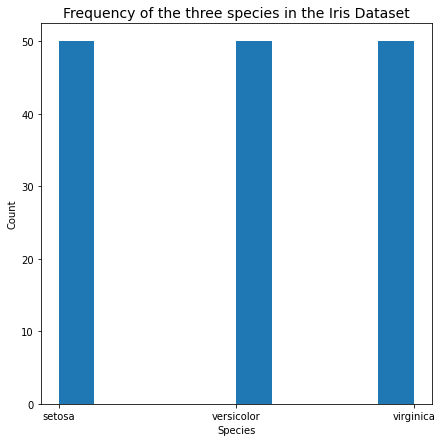

In [134]:
fig = plt.figure(figsize =(7, 7))
plt.hist(x='species',data=iris_df)
#set title for graph
plt.title('Frequency of the three species in the Iris Dataset',fontsize= 14)
# set x label
plt.xlabel('Species')
# set y label
plt.ylabel('Count')

    
plt.show();

### Plot the Pie of the three species in the Iris Dataset.

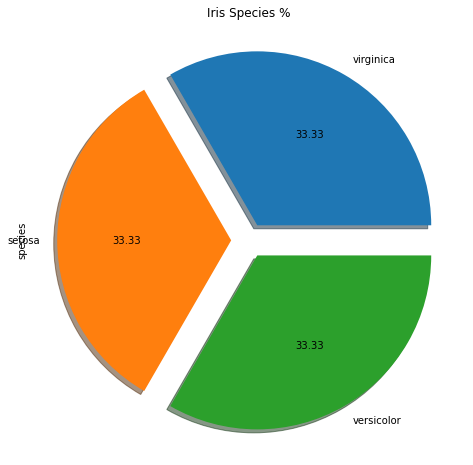

In [138]:
fig = plt.figure(figsize =(7, 5))
iris_df['species'].value_counts().plot.pie(explode=[0.1,0.1,0.1],autopct='%.2f',shadow=True,figsize=(10,8))
plt.title("Iris Species %")

plt.show();

### Combining Box and Strip Plots for Species vs sepal length.

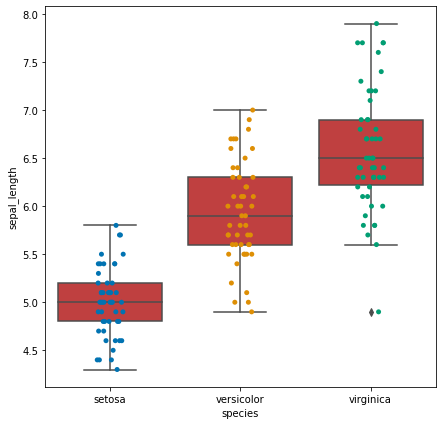

In [129]:
plt.figure(figsize = (7,7))
sns.stripplot(x = 'species',y = 'sepal_length',data = iris_df,
              palette = 'colorblind',edgecolor = 'black')
sns.boxplot(x = 'species',y = 'sepal_length',data = iris_df,color = 'red',saturation=.5)
plt.show();

### Find out the correlation between different features in the dataset

In [139]:
data = iris_df[iris_df.columns]
#data
corr = data.corr(method="pearson")

In [140]:
bool_upper_matrix = np.tril(np.ones(corr.shape)).astype(np.bool)
corr = corr.where(bool_upper_matrix)
display(corr)

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,NaN,NaN,NaN
sepal_width,-0.117570,1.000000,NaN,NaN
petal_length,0.871754,-0.428440,1.000000,NaN
petal_width,0.817941,-0.366126,0.962865,1.0


### Plot Venn diagram for sepal length vs sepal width.

In [141]:
from matplotlib_venn import venn2,venn2_circles

In [142]:
print(len(iris_df['sepal_length']))
print(len(iris_df['sepal_width']))

150
150


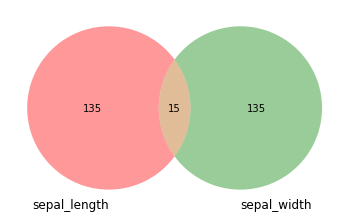

In [143]:
sepal_length = iris_df.iloc[:,0]
sepal_width = iris_df.iloc[:,1]

# First way to call the 2 group Venn diagram
venn2(subsets = (len(sepal_length)-15, len(sepal_width)-15, 15), 
      set_labels = ('sepal_length', 'sepal_width'))
plt.show();

### Questions 4 :
### Pandas+Matplotlib Assignment

In [144]:
df = pd.read_csv('Indicators.csv')
df.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06


### How many UNIQUE country names are there ?

In [146]:
country_name = len(df['CountryName'].unique())
country_name
#there are a total of 247 unique country names 

247

### Are there the same number of country codes ?

In [147]:
country_code = len(df['CountryCode'].unique())
country_code == country_name
#the country code are eqaul to the number of country names

True

### Are there many indicators or few ?

In [148]:
indicators = len(df['IndicatorName'].unique())
indicators
#there are a total of 1344 indicators which is quite large

1344

### How many years of data do we have ?

In [149]:
year = df['Year'].unique()
len(year)
#we have a total of 56 years of data

56

### What's the range of years?

In [150]:
min_year = df['Year'].min()
max_year = df['Year'].max()
print(min_year)
print(max_year)

1960
2015


### ScatterPlot for comparing GDP against CO2 emissions (per capita)

In [151]:
co2_emission = df[df['IndicatorName']=='CO2 emissions (metric tons per capita)']

In [152]:
co2_emission.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
8,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,0.643964
86,Caribbean small states,CSS,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,1.402641
166,Central Europe and the Baltics,CEB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,5.114244
239,East Asia & Pacific (all income levels),EAS,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,1.162003
362,East Asia & Pacific (developing only),EAP,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,0.952729


In [153]:
value = co2_emission['Value']
co2_emission_per_capita = co2_emission['IndicatorName']

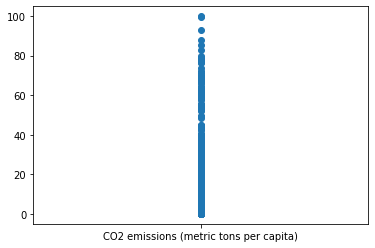

In [154]:
plt.scatter(x = co2_emission_per_capita, y = value)
plt.show();